<a href="https://colab.research.google.com/github/FranciscoAssislsj/Analise_de_investimento_em_publicidade/blob/main/RID215840_Desafio04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando as Bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

%pip install plotly
%pip install cufflinks
%pip install chart-studio
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
# Trazendo o arquivo para o google colab
from google.colab import files
uploaded = files.upload()

Saving MKT.csv to MKT.csv


In [ ]:
# A variável 'data' recebe o dataset
data = pd.read_csv("MKT.csv")

##DESCRIÇÃO DOS DADOS

Coluna    | Descrição

youtube   | Investimento youtube

facebook  | Investimento facebook

newspaper | Investimento newspaper

sales     | Valor das vendas

#ANÁLISE DESCRITIVA

In [ ]:
# Estrutura dos dados
# Dataset possui 171 linhas e 4 colunas

data

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
...,...,...,...,...
166,45.84,4.44,16.56,9.12
167,113.04,5.88,9.72,11.64
168,212.40,11.16,7.68,15.36
169,340.32,50.40,79.44,30.60


In [ ]:
# Tipo dos dados
# Todos os dados estão com o type correto, float

data.dtypes

,0
youtube,float64
facebook,float64
newspaper,float64
sales,float64


In [ ]:
# dataset não apresenta nenhum valor nulo

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
# Descrição dos dados
# A média de investimento em youtube e muito superior a facebook e newspaper

data.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [ ]:
data.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
# Total de valor investido em youtube, facebook e newspaper

data[["youtube","facebook","newspaper"]].sum().sort_values(ascending = False)

,0
youtube,30441.60
newspaper,6026.04
facebook,4731.84


In [ ]:
# Valor total investido combinando todas as plataformas

total = data[["youtube","facebook","newspaper"]].sum().sum()
total_invest = pd.DataFrame(data = [total],columns = ['Total Investiment'])
total_invest

,Total Investiment
0,41199.48


In [ ]:
# Quantidade total de vendas

data[['sales']].sum()

,0
sales,2893.8


In [ ]:
# Criando um variável apenas com os investimentos em ordem crescente

data_total_inv = data[["youtube","facebook","newspaper"]].sum().sort_values(ascending = False)

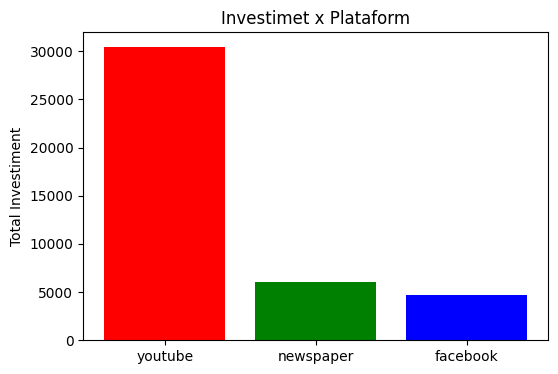

In [ ]:
# Grafico utilizando maplotlib total investido por plataforma
# youtube é a plataforma com maior valor de investimento

plt.figure(figsize = (6,4))
plt.bar(data_total_inv.index,data_total_inv.values, color = ["red","green","blue"])
plt.ylabel("Total Investiment")
plt.title("Investimet x Plataform");

In [ ]:
data_mean_inv = data[['youtube','facebook','newspaper']].mean().sort_values(ascending=False)

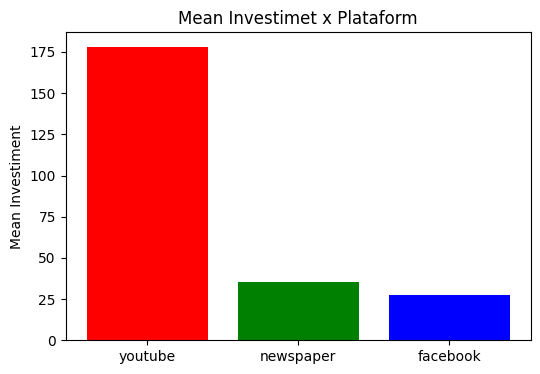

In [ ]:
# Grafico utilizando maplotlib média de investimento por plataforma
# youtube é a plataforma com maior média de investimento

plt.figure(figsize = (6,4))
plt.bar(data_mean_inv.index,data_mean_inv.values,color= ['red','green','blue'])
plt.ylabel("Mean Investiment")
plt.title("Mean Investimet x Plataform");


<Axes: xlabel='youtube', ylabel='Count'>

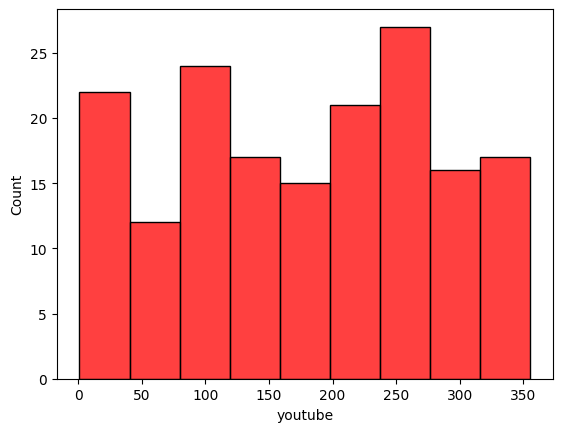

In [ ]:
# Histograma da frequência de investimento na plataforma facebook
# O histograma está na maior parte do tempo linear, demonstrando alguns picos

sns.histplot(data['youtube'],color='r')

<Axes: xlabel='newspaper', ylabel='Count'>

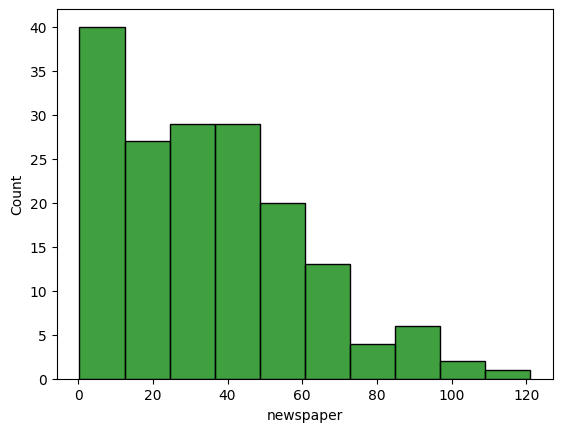

In [ ]:
# Histograma da frequência de investimento na plataforma facebook
# O histograma está decrescendo, demonstra que a frequência de investimento diminui a medida que o valor de investimento aumenta

sns.histplot(data['newspaper'],color = 'g')

<Axes: xlabel='facebook', ylabel='Count'>

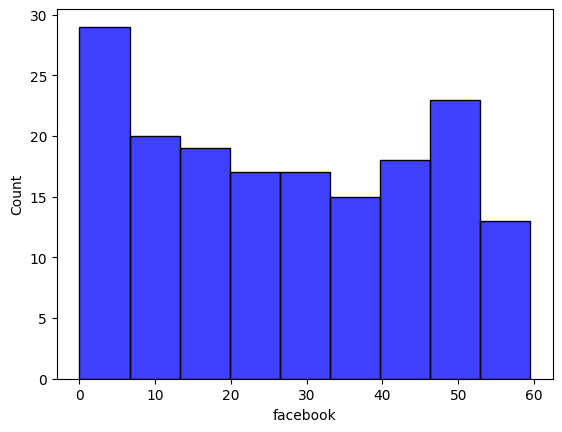

In [ ]:
# Histograma da frequência de investimento na plataforma facebook
# O histograma está linear, demonstra que a frequência de investimento segue um padrão independente do valor investido
sns.histplot(data['facebook'], color = "blue")

<Axes: ylabel='Count'>

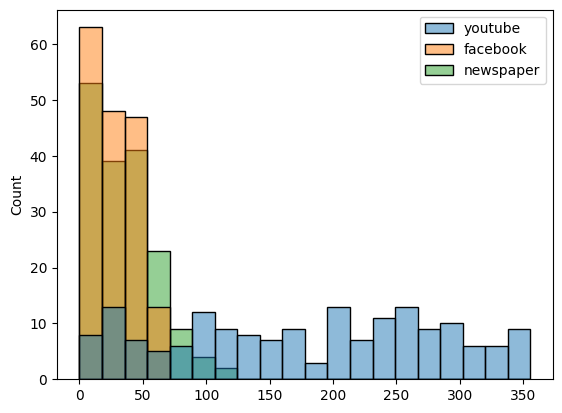

In [ ]:
# Histograma comparando a frequencia de acordo com o valor investido
# As plataformas facebook e newspaper apresentam maior frequência de investimento nos valores mais baixo, o youtube segue uma frequência mais baixa mas em compensação abrange uma distribuição maior de valores

sns.histplot(data[['youtube','facebook','newspaper']])

<Axes: xlabel='sales', ylabel='Count'>

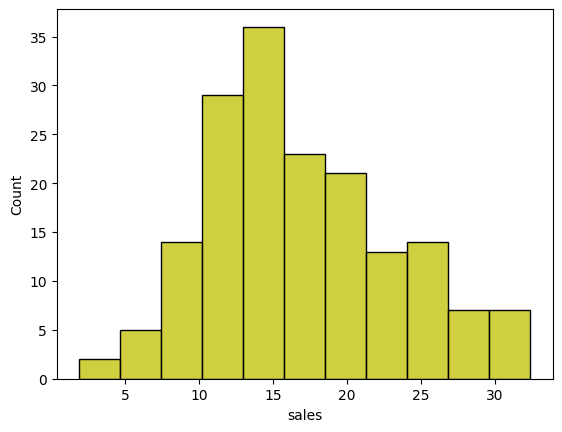

In [ ]:
# Distribuição de vendas segue aparentimente uma distribuição normal com pico por volta das 15 vendas

sns.histplot(data['sales'], color ='y')

#ANÁLISE EXPLORATÓRIA

<Axes: ylabel='youtube'>

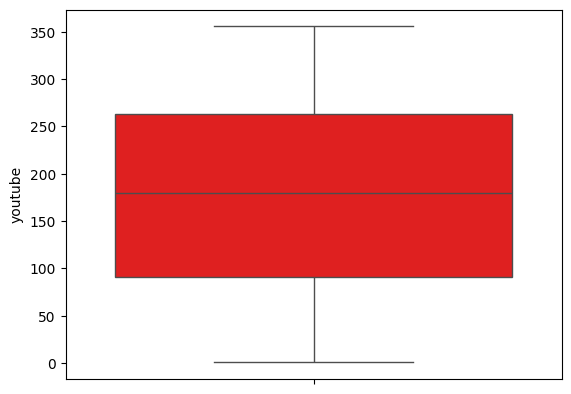

In [ ]:
# YOUTUBE
# 50% dos investimentos está entre 100 e 250

sns.boxplot(data['youtube'], color = "red")

<Axes: ylabel='facebook'>

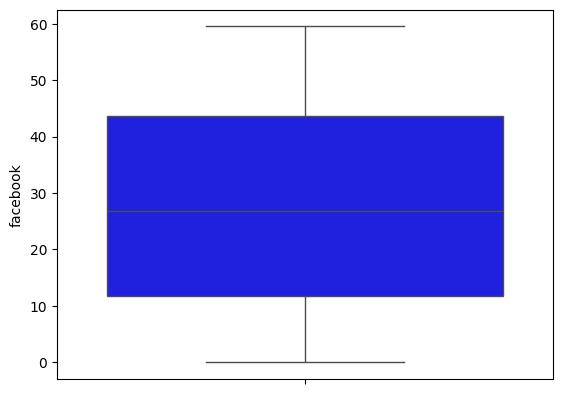

In [ ]:
# FACEBOOK
# 50% dos investimentos está entre 10 e 40
sns.boxplot(data['facebook'], color = "blue")

<Axes: ylabel='newspaper'>

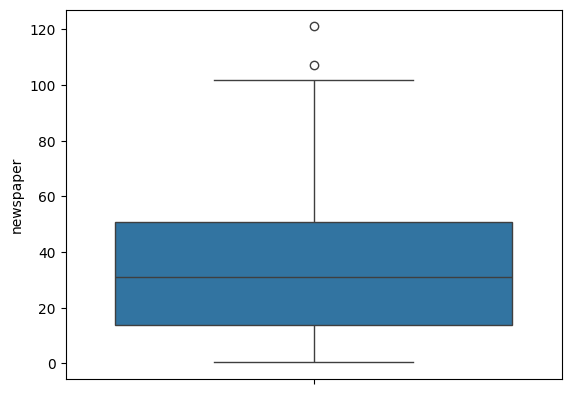

In [ ]:
# NEWSPAPER
# 50% dos investimentos estão entre 20 e 50
# Apresenta alguns outliers representando investimentos muito altos

sns.boxplot(data['newspaper'])

<Axes: >

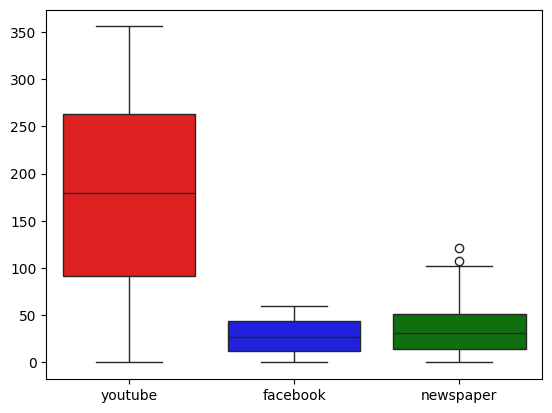

In [ ]:
# Boxplot comparando as 3 plataformas
# youtube -> Mediana por volta de 175, Variação de investimento alta
# facebook -> Mediana por volta de 25, Variação baixa comparada a youtube
# newspaper -> Mediana por volta de 30, Apresenta alguns outliers e tem uma pequena quantidade de investimentos altos o que faz o limite superior ficar mais distante

sns.boxplot(data[['youtube','facebook','newspaper']],palette = ["red",'blue','green'])

In [ ]:
# Sales
# Mediana por volta de 15, concentração de valores por volta da mediana
# 50% das vendas estão entre 12 e 21

fig = px.box(data, x = 'sales')
fig.update_traces(line_color = "blue")

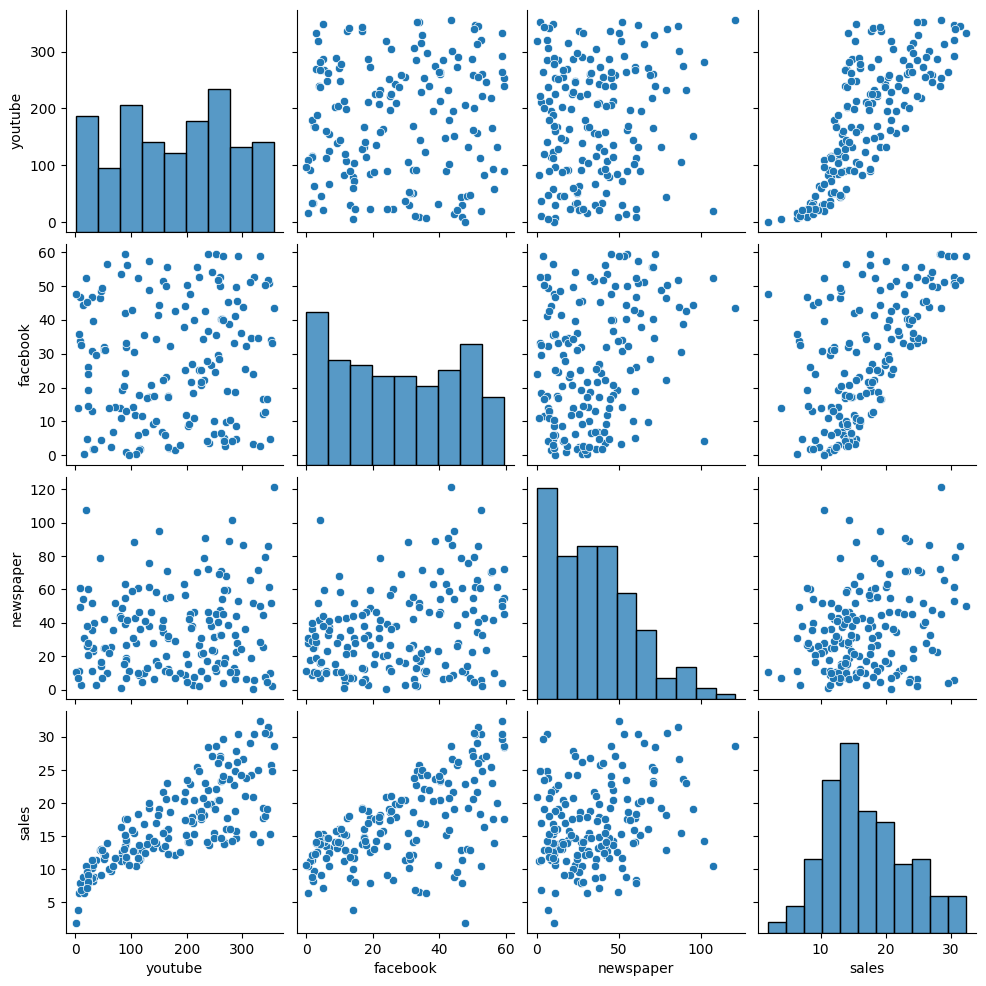

In [ ]:
# Gráfico de dispersão
# Correlação entre todas as variaveis

sns.pairplot(data)

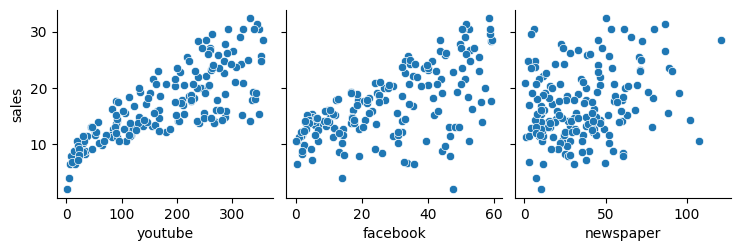

In [ ]:
# Gráfico de dispersão
# Variaveis em relação a vendas
# youtube e facebook tem uma distribuição linear, o que demonstra maior correlação com o numero de sales

sns.pairplot(data, x_vars = ['youtube','facebook','newspaper'], y_vars = 'sales')

In [ ]:
# Correlação entre as variaveis
# youtube e facebook são as plataformas que mais influencia a quantidade de vendas

data.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


<Axes: >

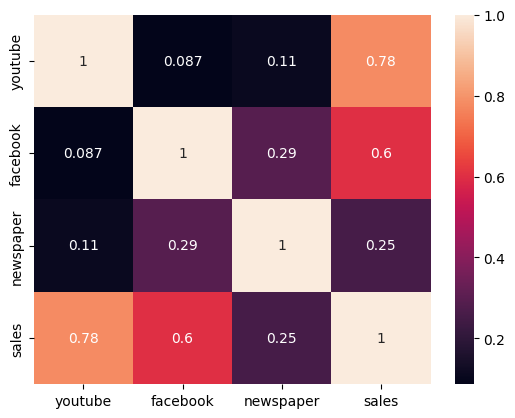

In [ ]:
# Correlação entre as variaveis no grafico heatmap

sns.heatmap(data.corr(), annot = True)

#MODELAGEM

In [ ]:
# Atribuindo X variaveis features e y variavel target
X = data[['youtube','facebook','newspaper']]

y = data[['sales']]

In [ ]:
# Realiza a divisão dos dados da base de dados em 70% para treino e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(119, 3)
(52, 3)
(119, 1)
(52, 1)


In [ ]:
# Criação do modelo
model = LinearRegression()

In [ ]:
# Treino do modelo
model.fit(X_train, y_train)

LinearRegression()

# CALCULANDO A PREDIÇÃO

In [ ]:
# Fazendo a previsão de acordo com os dados de X_test

y_pred = model.predict(X_test)

In [ ]:
# Comparando o y_test com os valores previsto do modelo

r = r2_score(y_test, y_pred)

In [ ]:
# r2 = 1 -> O modelo prediz perfeitamente os dados
# r2 = 0 -> O modelo não consegue explicar a variabilidade nos dados
# r2 = -1 -> modelo mal ajusto ou inadequado

# r2 = 0.88 o modelo está predizendo bem os valores de y

print("r_quadrado: ",r)

r_quadrado:  0.882423505618885


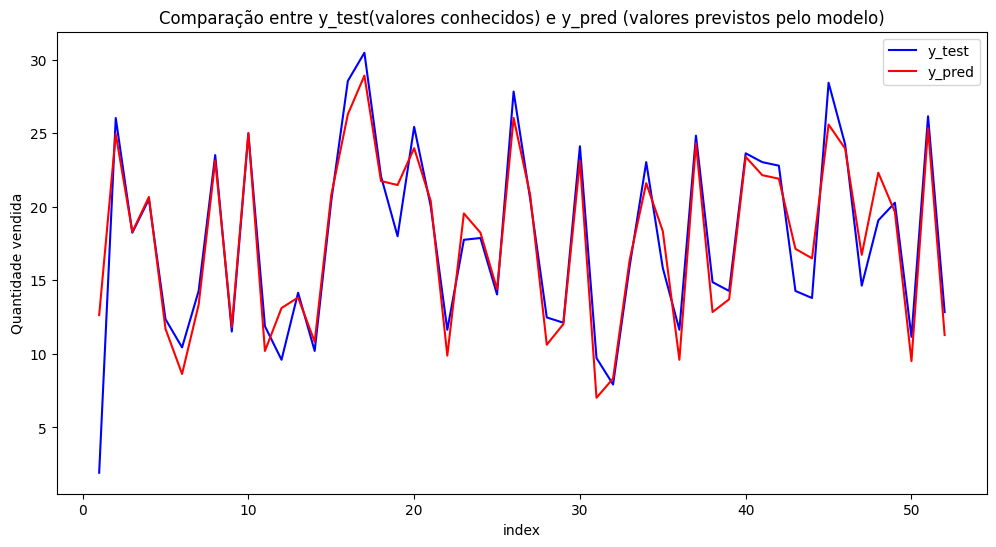

In [ ]:
# Gráfico utilizando matplotlib do comparativo y_test e y_pred

c = [i for i in range(1,53)]
fig = plt.figure(figsize = (12,6))
plt.plot(c,y_test, color ='blue')
plt.plot(c,y_pred, color = 'red')
plt.xlabel('index')
plt.ylabel("Quantidade vendida")
plt.legend(['y_test','y_pred'])
plt.title("Comparação entre y_test(valores conhecidos) e y_pred (valores previstos pelo modelo)")
plt.show()

In [ ]:
data.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [ ]:
# Testando o modelo
# Passando valores e fazendo a previsão

youtube = 150
facebook = 50
newspaper = 30

entrada = [[youtube,facebook,newspaper]]
previsao = model.predict(entrada)[0]
print(f'Vendas previstas: {previsao}')

Vendas previstas: [19.84785459]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



##Conclusão

Realizando a analise do modelo com diferentes valores para youtube, facebook e newspaper, podemos verificar que o peso do investimento em facebook proporciona uma maior geração de vendas mesmo que o valor médio de investimento seja inferior ao youtube e newspaper.

Como Cientista de dados transmitiria para a equipe de marketing que um maior investimento de publicidade nas plataforma youtube e facebook trariam um melhor retorno para a organização em comparação ao investimento realizado em newspaper.

Além disso, informaria que embora o investimento em publicidade no Facebook seja menor em comparação ao YouTube e ao Newspaper, os resultados da análise indicam que o Facebook oferece o maior retorno em relação ao valor investido. Ou seja, mesmo com um orçamento inferior, o impacto nas vendas gerado pelo Facebook é mais significativo, sugerindo que esta plataforma tem uma eficiência superior no que diz respeito à conversão de investimento em vendas."